<a href="https://colab.research.google.com/github/udhayasankar143/Air-quality-prediction-/blob/main/Google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PRSA_data_2010.1.1-2014.12.31.csv to PRSA_data_2010.1.1-2014.12.31.csv


Load the Dataset

In [ ]:
import pandas as pd

# Replace the file name if different
df = pd.read_csv('/content/PRSA_data_2010.1.1-2014.12.31.csv')
df.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


Data Exploration

In [ ]:
# Shape and info
print("Shape:", df.shape)
print("\nInfo:\n")
df.info()

# Describe
df.describe()


Shape: (43824, 13)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


Check for Missing Values and Duplicates

In [ ]:
# Missing values
print("Missing values:\n", df.isnull().sum())

# Duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Drop duplicates if necessary
df = df.drop_duplicates()


Missing values:
 No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

Duplicate rows: 0


 Visualize a Few Features

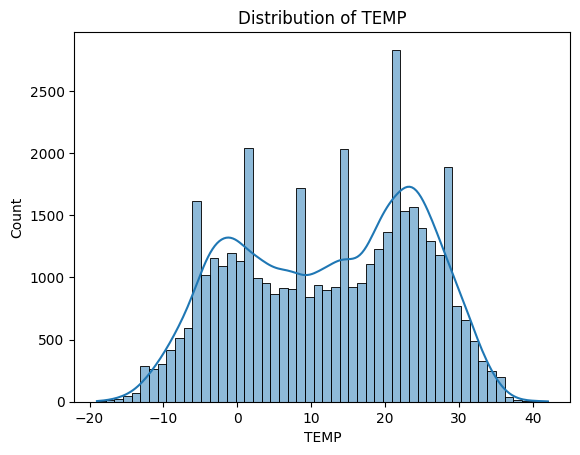

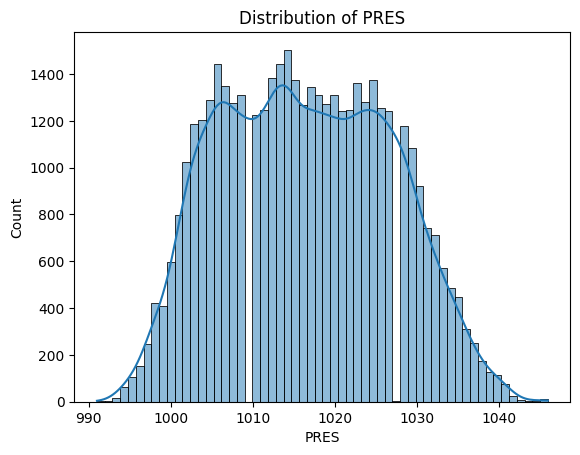

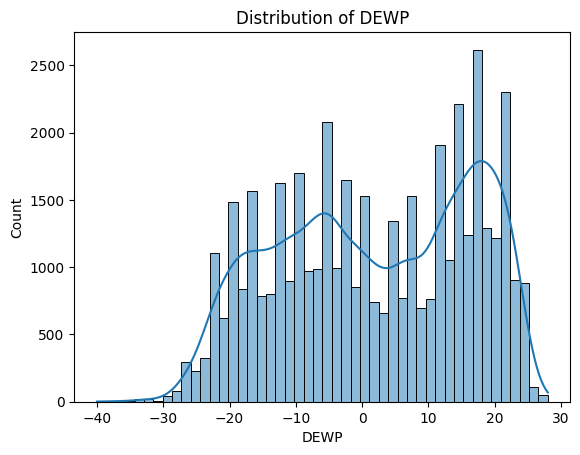

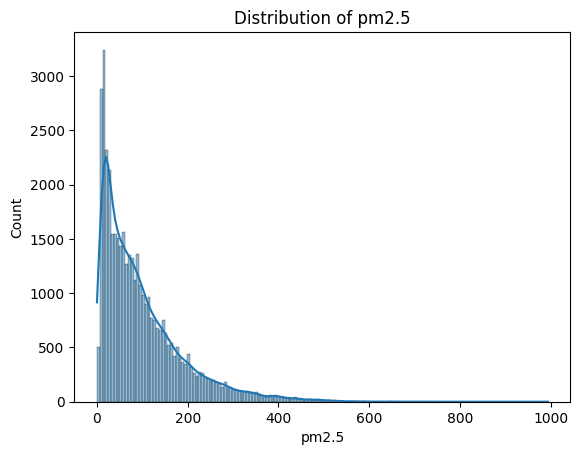

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of a few numeric features
features = ['TEMP', 'PRES', 'DEWP', 'pm2.5']
for feature in features:
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


Identify Target and Features

In [ ]:
# Assuming 'pm2.5' is the target variable
target = 'pm2.5'
features = df.drop(columns=[target]).columns.tolist()
print("Features:", features)


Features: ['No', 'year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir']


Convert Categorical Columns to Numerical

In [ ]:
# Example: converting 'cbwd' (wind direction) to numerical codes
if 'cbwd' in df.columns:
    df['cbwd'] = df['cbwd'].astype('category').cat.codes


One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)


 Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop(columns=[target]))
X = pd.DataFrame(scaled_features, columns=df.drop(columns=[target]).columns)
y = df[target]


 Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Building

In [ ]:
# Drop rows where target (pm2.5) is NaN
df = df.dropna(subset=['pm2.5'])

# Now reassign X and y
X = df.drop(columns=['pm2.5'])
y = df['pm2.5']

# Also, re-encode and scale as before
X['cbwd'] = X['cbwd'].astype('category').cat.codes
X = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)


RandomForestRegressor()

 Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))


MSE: 1212.5156050766286
R^2 Score: 0.8623941962718467


Make Predictions from New Input

In [ ]:
import numpy as np

# If X_test is a DataFrame
if hasattr(X_test, 'iloc'):
    sample = X_test.iloc[0].values.reshape(1, -1)
else:  # If it's a NumPy array
    sample = X_test[0].reshape(1, -1)

prediction = model.predict(sample)
print("Predicted PM2.5:", prediction[0])


Predicted PM2.5: 142.03


Convert to DataFrame and Encode

In [ ]:
# Simulate user input
user_input = {'TEMP': 5, 'PRES': 1020, 'DEWP': -3, 'cbwd': 'NW', 'Iws': 10, 'Is': 0, 'Ir': 0}
user_df = pd.DataFrame([user_input])

# Convert categorical columns
if 'cbwd' in user_df.columns:
    user_df['cbwd'] = user_df['cbwd'].astype('category').cat.codes

print("Scaler was fitted on:", scaler.feature_names_in_)
print("User input columns: ", user_df.columns.tolist())



Scaler was fitted on: ['No' 'year' 'month' 'day' 'hour' 'DEWP' 'TEMP' 'PRES' 'cbwd' 'Iws' 'Is'
 'Ir']
User input columns:  ['TEMP', 'PRES', 'DEWP', 'cbwd', 'Iws', 'Is', 'Ir']


Predict the Final Grade (PM2.5)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Simulated training data (replace with your actual data)
data = {
    'TEMP': [22, 25, 20, 18, 23, 19],
    'PRES': [1015, 1020, 1012, 1018, 1016, 1022],
    'DEWP': [10, 12, 8, 7, 9, 11],
    'cbwd': ['NW', 'NE', 'SE', 'SW', 'NW', 'SE'],
    'Iws': [15, 18, 13, 12, 14, 16],
    'Is': [5, 3, 4, 6, 5, 4],
    'Ir': [0, 1, 0, 0, 1, 0],
    'PM2.5': [25, 30, 20, 15, 28, 22]  # Target variable (Final Grade - PM2.5)
}

df = pd.DataFrame(data)

# Preprocessing
# Handle categorical variable 'cbwd' (convert to numerical codes)
df['cbwd'] = df['cbwd'].astype('category').cat.codes

# Feature columns and target variable
X = df.drop('PM2.5', axis=1)
y = df['PM2.5']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training (Random Forest Regressor)
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Prediction for new data (simulated user input)
user_input = {'TEMP': 5, 'PRES': 1020, 'DEWP': -3, 'cbwd': 'NW', 'Iws': 10, 'Is': 0, 'Ir': 0}
user_df = pd.DataFrame([user_input])

# Convert categorical feature (same as training time)
user_df['cbwd'] = user_df['cbwd'].astype('category').cat.codes

# Scale the user input
user_df_scaled = scaler.transform(user_df)

# Make prediction
final_prediction = model.predict(user_df_scaled)
print("Final Predicted PM2.5:", final_prediction[0])





Final Predicted PM2.5: 19.66


Deployment - Building an Interactive App

In [ ]:
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 115.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


 Create a Prediction Function

In [ ]:
def predict_pm25(year, month, day, hour, DEWP, TEMP, PRES, Iws, cbwd):
    import numpy as np
    import pandas as pd

    # Ensure cbwd matches the one-hot or categorical format you used
    cbwd_map = {'NW': 0, 'NE': 1, 'SE': 2, 'SW': 3}
    cbwd_num = cbwd_map.get(cbwd, 0)  # default to 0 if not found

    # Construct the input using the same order and columns
    input_data = pd.DataFrame([[year, month, day, hour, DEWP, TEMP, PRES, Iws, cbwd_num]],
                              columns=['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'cbwd'])

    # Convert cbwd to same encoding as during training
    input_data['cbwd'] = input_data['cbwd'].astype('int')

    # Apply the same feature scaling
    input_scaled = scaler.transform(input_data)

    # Predict
    prediction = model.predict(input_scaled)
    return f"Predicted PM2.5: {prediction[0]:.2f}"


Create the Gradio Interface

In [ ]:
def predict_pm25(year, month, day, hour, DEWP, TEMP, PRES, Iws, cbwd):
    import pandas as pd
    import numpy as np

    # Map wind direction to numeric (same as in training)
    cbwd_map = {'NW': 0, 'NE': 1, 'SE': 2, 'SW': 3}
    cbwd_num = cbwd_map.get(cbwd, 0)  # Default to 0 if unknown

    # Create DataFrame (ensure same column names and order used in training)
    input_df = pd.DataFrame([[year, month, day, hour, DEWP, TEMP, PRES, Iws, cbwd_num]],
                            columns=['year', 'month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'Iws', 'cbwd'])

    # Scale features
    try:
        input_scaled = scaler.transform(input_df)
    except Exception as e:
        return f"Scaling Error: {str(e)}"

    # Predict
    try:
        prediction = model.predict(input_scaled)
        return f"Predicted PM2.5: {prediction[0]:.2f}"
    except Exception as e:
        return f"Prediction Error: {str(e)}"


In [ ]:
import gradio as gr

iface = gr.Interface(
    fn=predict_pm25,
    inputs=[
        gr.Number(label="Year"),
        gr.Number(label="Month"),
        gr.Number(label="Day"),
        gr.Number(label="Hour"),
        gr.Number(label="Dew Point (DEWP)"),
        gr.Number(label="Temperature (TEMP)"),
        gr.Number(label="Pressure (PRES)"),
        gr.Number(label="Wind Speed (Iws)"),
        gr.Dropdown(["NW", "NE", "SE", "SW"], label="Wind Direction (cbwd)")
    ],
    outputs="text",
    title="Air Quality PM2.5 Predictor",
    description="Enter weather values to predict air pollution levels."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d3a344731773db0a56.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
